# Linear Algebra _ 07 dimension
##  Learning Objectives
- Understand **Span**, **Basis**, and **Dimension** of a vector space  
- Compute **Null Space** and **Column Space** of a matrix  
- Relate the **dimension** of these subspaces to the **rank of a matrix**

---


# Table of Contents 
1. [Span of Vectors](#Span)
2. [Dimension](#Dimension)
3. [Relation Between Dimensions](#Relation)
4.  [Visualization](#Visualization)

##  Span of Vectors<a name='Span'>

The **span** of a set of vectors is the set of all possible **linear combinations** of those vectors.

$$
\text{Span}\{ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_k \}
= \{ c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_k \mathbf{v}_k \mid c_i \in \mathbb{R} \}
$$

If vectors in a set **span** $\mathbb{R}^n$, they form the entire n-dimensional space.


## Dimension<a name='Dimension'>
The **dimension** of a vector space is the **number of vectors in a basis**.

$$
\dim(V) = \text{number of basis vectors of } V
$$

If $A$ is an $m \times n$ matrix:
- **Column space** → all linear combinations of columns of $A$
- **Null space** → all solutions $\mathbf{x}$ to $A\mathbf{x} = 0$


In [47]:
# Example in Python
import numpy as np
from sympy import Matrix
A = Matrix([[1, 2, 3],
            [2, 4, 6],
            [1, 1, 1]])
col_space = A.columnspace()
null_space = A.nullspace()

print("Column Space (basis vectors):")
for v in col_space :
    print(v)

print("\nNull Space (basis vectors):")
for v in null_space:
    print(v)

print("\nRank (dimension of column space):", A.rank())
print("Nullity (dimension of null space):", len(null_space))


Column Space (basis vectors):
Matrix([[1], [2], [1]])
Matrix([[2], [4], [1]])

Null Space (basis vectors):
Matrix([[1], [-2], [1]])

Rank (dimension of column space): 2
Nullity (dimension of null space): 1


( 2 + 1 = 3 = n \)\).

---

---

## Relation Between Dimensions<a name='Relation'>

$$
\text{rank}(A) + \text{nullity}(A) = n
$$

---
### Explanation

- **Rank(A)** → The number of **linearly independent columns** of \( A \).  
  This equals the **dimension of the column space** (also called the **range** or **image** of \( A \)).

- **Nullity(A)** → The number of **free variables** in the equation \( A\mathbf{x} = 0 \).  
  This equals the **dimension of the null space** (the set of solutions that map to zero).

Together, they add up to the **total number of columns** \( n \).

---
### Example
Let

$$
A =
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 6 \\
1 & 1 & 1
\end{bmatrix}
$$

This is a $ 3 \times 3 $ matrix.  
Since the second column is a multiple of the first, the columns are **not all independent**.

Therefore:

- $\text{rank}(A) = 2 $
- $ \text{nullity}(A) = 1 $
- $ 2 + 1 = 3 = n $


In [51]:
# Example
import numpy as np
from sympy import Matrix

A = Matrix([[1, 2, 3],
            [2, 4, 6],
            [1, 1, 1]])
rank = A.rank()
null_space = A.nullspace()

print("Rank (dimension of column space):", rank)
print("Nullity (dimension of null space):", len(null_space))
print("Rank + Nullity =", rank + len(null_space))
print("Number of columns =", A.shape[1])

Rank (dimension of column space): 2
Nullity (dimension of null space): 1
Rank + Nullity = 3
Number of columns = 3


## Intuition (Data Science View)

**Rank**: How many useful directions your data truly has

**Nullity**:How many redundant or dependent directions exist

High rank means your data has more independent features → better for ML models

## Visualization<a name='Visualization'>
visualize a simple transformation where a matrix \(A\) maps 2D vectors into a line.  
This will show that one direction is **lost** (null space) and the other **survives** (column space).

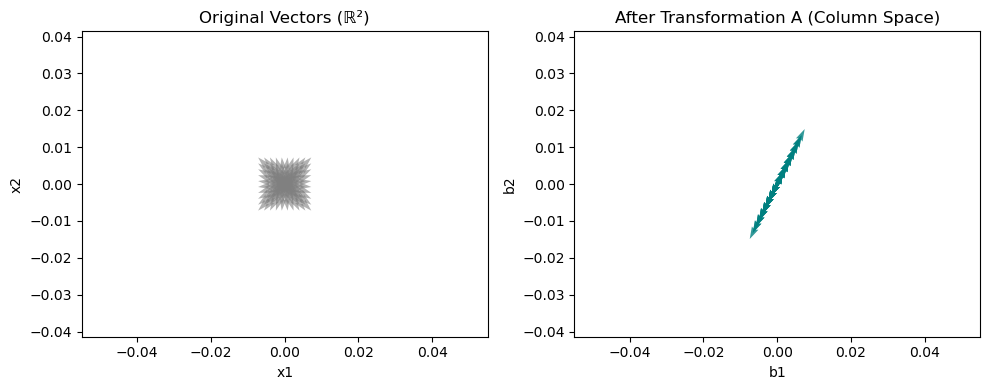

In [60]:
import numpy as np
import matplotlib.pyplot as plt


# Define a simple 2x2 matrix that collapses 2D space into 1D (a line)
A = np.array([[1, 1],
              [2, 2]])

x_vals = np.linspace(-2, 2 ,10)
y_vals =  np.linspace(-2,2,10)
X, Y = np.meshgrid(x_vals, y_vals)

points = np.vstack([X.ravel(), Y.ravel()])
transformed = A @ points

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.quiver(np.zeros_like(points[0]), np.zeros_like(points[1]), 
           points[0], points[1], color='gray', alpha=0.6)
plt.title("Original Vectors (ℝ²)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')

# Plot transformed vectors
plt.subplot(1, 2, 2)
plt.quiver(np.zeros_like(transformed[0]), np.zeros_like(transformed[1]), 
           transformed[0], transformed[1], color='teal', alpha=0.8)
plt.title("After Transformation A (Column Space)")
plt.xlabel("b1")
plt.ylabel("b2")
plt.axis('equal')

plt.tight_layout()
plt.show()